![CDC Logo](https://www.hamiltoncountyhealth.org/wp-content/uploads/cdc-logo.png) <br>

# Contents
1. Business Understanding <br>


2. EDA and Data Cleaning <br>


3. Modeling <br>
    3.1 Dummy Model <br>
    3.2 DecisionTree Classifier <br>
    3.3 LogisticRegression Classifier <br>
    
    
4. Results <br>


5. Conclusion <br>


6. Recommendations <br>


7. Future Considerations

# 1. Business Understanding
## Tackling Flu and Vaccine Misinformation for the CDC
The mission statement of the CDC is **"to promote health and quality of life by preventing and controlling disease, injury, and disability."**
<br>

And so, an integral part of fulfilling this mission is to provide the population with the appropriate infromation that is needed in order to make the best informed decisions for their health. 
<br>

Disease and vaccine misinformation are a major hurdle for the CDC. Lack of information or knowledge of the wrong information can lead to misinformed decisions that will compromise not only a single individual's health and safety but the population's as well.
<br>

The main goal of our project is to predict what features are most influential in determining a respondent's knowledge of the H1N1 flu and vaccine. Once we identify what features are most influential to a respondent's knowledge, we can focus on these features as areas of that the CDC should focus on in order to minimize the dangers of misinformation.

# 2. EDA and Data Cleaning

## Data and Limitations
The data that we will be working with in this project comes from the [DrivenData](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/) website. This data is a survey response from 2009. <br>

Since this data is from a survey response, it does not give an accurate reflection of the situation and community at the time. The data also has a pretty obvious class imbalance and some clear biases.<br> 


## Loading in the Data and some Initial EDA
We are looking at the vaccine data from 2009 about H1N1 flu and vaccine awareness. 
<br>

The data survey response data that we got from DrivenData had about 27,000 recorded responses.

In [1]:
# Importing the appropriate libraries that will be utilized throughout this notebook
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import statsmodels
from statsmodels.formula.api import ols
from sklearn.dummy import DummyRegressor

from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from folium.plugins import FastMarkerCluster

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
# Loading in the pre-split datasets that were given to us
vaccinetrainingdf = pd.read_csv("data/training_set_features.csv")
vaccinetestdf = pd.read_csv("data/test_set_features.csv")
vaccinelabelsdf = pd.read_csv("data/training_set_labels.csv")

In [3]:
# Initial checking to see what data types we are working with as well as to see if we had any missing data
# Commenting outputs out from notebook to reduce size of notebook/pdf
## vaccinetrainingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

As we can see there are some missing values, and some of the values are objects. Since some of the values in these columns are objects, we know that we have to one hot encode the values in order to implement them mathematically into our models.

In [4]:
vaccinetrainingdf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
# We see here that the data is already split almost exactly in half for our training and test data sets
# Commenting outputs out from notebook to reduce size of notebook/pdf
## vaccinetestdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [6]:
# Utilizing this block of code just to display all the columns and their respective values
pd.set_option('max_columns', None)
vaccinetestdf.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [7]:
vaccinelabelsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


Next, we're going to be doing some data cleaning to get rid of any extraneous columns that we determined were not relevant to our business problem of tackling misinformation in flu and vaccine awareness.

In [8]:
# Dropping data we deemed unnecessary and irrelevant to our business problem
columns_to_drop = ['respondent_id','h1n1_knowledge', 'employment_occupation', 'employment_industry', 'household_children', 'household_adults', 'census_msa', 'hhs_geo_region',
                    'employment_status', 'rent_or_own', 'marital_status', 'opinion_seas_sick_from_vacc', 'opinion_seas_risk', 'health_insurance', 'child_under_6_months',
                    'health_worker']
X_train = vaccinetrainingdf.copy().drop(columns_to_drop, axis = 1)
X_test = vaccinetestdf.copy().drop(columns_to_drop, axis = 1)

# Setting the y_train and y_test to just be the values of our target column
y_train = vaccinetrainingdf['h1n1_knowledge']
y_test = vaccinetestdf['h1n1_knowledge']

In [9]:
# Checking our data again to see that we dropped the irrelevant columns. We went from 34 columns to 20 columns
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   behavioral_antiviral_meds    26636 non-null  float64
 2   behavioral_avoidance         26499 non-null  float64
 3   behavioral_face_mask         26688 non-null  float64
 4   behavioral_wash_hands        26665 non-null  float64
 5   behavioral_large_gatherings  26620 non-null  float64
 6   behavioral_outside_home      26625 non-null  float64
 7   behavioral_touch_face        26579 non-null  float64
 8   doctor_recc_h1n1             24547 non-null  float64
 9   doctor_recc_seasonal         24547 non-null  float64
 10  chronic_med_condition        25736 non-null  float64
 11  opinion_h1n1_vacc_effective  26316 non-null  float64
 12  opinion_h1n1_risk            26319 non-null  float64
 13  opinion_h1n1_sic

In [10]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26623 non-null  float64
 1   behavioral_antiviral_meds    26629 non-null  float64
 2   behavioral_avoidance         26495 non-null  float64
 3   behavioral_face_mask         26689 non-null  float64
 4   behavioral_wash_hands        26668 non-null  float64
 5   behavioral_large_gatherings  26636 non-null  float64
 6   behavioral_outside_home      26626 non-null  float64
 7   behavioral_touch_face        26580 non-null  float64
 8   doctor_recc_h1n1             24548 non-null  float64
 9   doctor_recc_seasonal         24548 non-null  float64
 10  chronic_med_condition        25776 non-null  float64
 11  opinion_h1n1_vacc_effective  26310 non-null  float64
 12  opinion_h1n1_risk            26328 non-null  float64
 13  opinion_h1n1_sic

## Feature Engineering
Created some frequently used functions that we will be utilizing throughout our project

In [11]:
# Defined a OneHotEncoder function for ease of access
def OHE(X_train, categories):
    onehot = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
    x_train_cat = pd.DataFrame(onehot.fit_transform(X_train[categories]))
    x_train_cat.columns = onehot.get_feature_names(categories)
    
    # Reset indices to avoid merging conflicts
    x_train_cat.reset_index(drop=True, inplace=True)
    X_train.reset_index(drop=True, inplace=True)
    
    # Joined the OHE dataframe to the dataframe that is passed into the function
    x_train_df = X_train.drop(categories, axis = 1).join(x_train_cat)
    return x_train_df

# Defined a function that takes in parameters to evaluate our models and then print out a confusion matrix for easier visualization
def confusion_and_metrics(model, X_test, y_test, y_pred):
    # Accuracy Score
    print(f"Accuracy Score: {model.score(X_test, y_test):.3f}")
    
    # Precision Score
    print(f"Precision Score: {precision_score(y_test, y_pred):.3f}")
    
    # Plot confusion matrix for visualization
    plot_confusion_matrix(model, X_test, y_test);

# Defined a function to take in column name and output log-odds coefficient and generate odds value.
def print_odds(dataframe, column_name):
    # Prints out the name of the column and it's original log_odds value
    print(f"{column_name}: {dataframe[column_name][0]}")
    
    # Prints out the odds value of the column
    print(f"Odds: {np.exp(dataframe[column_name][0])}")

In [12]:
# X_train

,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group,education,race,sex,income_poverty
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty
1,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,3.0,1.0,1.0,4.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,5.0,5.0,65+ Years,12 Years,White,Female,Below Poverty
4,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty"
26703,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,5.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
26704,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,55 - 64 Years,Some College,White,Female,NaN
26705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,3.0,1.0,2.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty"


### SimpleImputer to Account for NaN Values

Prior to running some classification models on our data, we looked at it again and noticed that there were still a couple missing values. 
<br>

In order to rectify this, we created a simple imputer to replace the NaN values with the most frequent value(otherwise known as the mode) in its respective column.
<br>

We chose to use the mode to replace these NaN values because using the mode will keep the distribution of the data consistent.

In [13]:
# Created a SimpleImputer to replace the NaN values with the most_frequent(mode) values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent')
imputed_X_train = imputer.fit_transform(X_train)
imputed_X_train_df = pd.DataFrame(imputed_X_train)

In [14]:
imputed_X_test = imputer.transform(X_test)
imputed_X_test_df = pd.DataFrame(imputed_X_test)
imputed_X_test_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,0,1,0,1,1,0,1,0,0,0,5,1,1,5,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000"
1,1,0,0,0,0,0,0,0,0,0,0,4,1,1,4,18 - 34 Years,12 Years,White,Male,Below Poverty
2,2,0,0,1,1,1,1,1,0,0,0,5,4,2,5,55 - 64 Years,College Graduate,White,Male,"> $75,000"
3,1,0,0,0,0,0,0,0,1,1,1,4,2,2,4,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty"
4,3,1,1,0,1,1,1,1,0,0,0,5,2,4,4,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1,0,1,0,1,0,0,1,1,1,0,4,2,2,4,35 - 44 Years,College Graduate,White,Female,"<= $75,000, Above Poverty"
26704,3,0,1,0,1,1,1,1,0,0,0,4,1,1,5,18 - 34 Years,12 Years,White,Male,Below Poverty
26705,0,0,0,0,0,0,0,0,0,0,0,4,3,1,4,18 - 34 Years,Some College,White,Female,Below Poverty
26706,3,0,1,0,1,0,1,0,0,0,0,2,3,4,4,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty"


In [15]:
# After doing the imputation and renaming, checked to see if the counts of the values in all columns was the same
imputed_X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       26708 non-null  object
 1   1       26708 non-null  object
 2   2       26708 non-null  object
 3   3       26708 non-null  object
 4   4       26708 non-null  object
 5   5       26708 non-null  object
 6   6       26708 non-null  object
 7   7       26708 non-null  object
 8   8       26708 non-null  object
 9   9       26708 non-null  object
 10  10      26708 non-null  object
 11  11      26708 non-null  object
 12  12      26708 non-null  object
 13  13      26708 non-null  object
 14  14      26708 non-null  object
 15  15      26708 non-null  object
 16  16      26708 non-null  object
 17  17      26708 non-null  object
 18  18      26708 non-null  object
 19  19      26708 non-null  object
dtypes: object(20)
memory usage: 4.1+ MB


After imputing the data, we recognize that the column names have disappeared but the indices are still there. To resolve this, we create a dictionary with the original column names and call the rename function on this new data frame's columns.

In [16]:
# Extracting column names into a dictionary
dictionary_of_names = {columns: index for index, columns in enumerate(X_train.columns)}

# Flipping the column keys and values
dictionary_of_names_flipped = {dictionary_of_names[keys]:keys for keys in dictionary_of_names}

# Checking to see if the column names were extracted and flipped correctly
dictionary_of_names_flipped

{0: 'h1n1_concern',
 1: 'behavioral_antiviral_meds',
 2: 'behavioral_avoidance',
 3: 'behavioral_face_mask',
 4: 'behavioral_wash_hands',
 5: 'behavioral_large_gatherings',
 6: 'behavioral_outside_home',
 7: 'behavioral_touch_face',
 8: 'doctor_recc_h1n1',
 9: 'doctor_recc_seasonal',
 10: 'chronic_med_condition',
 11: 'opinion_h1n1_vacc_effective',
 12: 'opinion_h1n1_risk',
 13: 'opinion_h1n1_sick_from_vacc',
 14: 'opinion_seas_vacc_effective',
 15: 'age_group',
 16: 'education',
 17: 'race',
 18: 'sex',
 19: 'income_poverty'}

In [17]:
# Created new variables for the training and test datasets. These new variables contain the imputed versions of the data with the columns renamed to their original names.
imputed_X_train_df_plus_column_names = imputed_X_train_df.rename(dictionary_of_names_flipped, axis = 1)
imputed_X_test_df_plus_column_names = imputed_X_test_df.rename(dictionary_of_names_flipped, axis = 1)

In [18]:
# Calling the new dataframe variables to check if the renaming was done correctly.
imputed_X_test_df_plus_column_names

,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group,education,race,sex,income_poverty
0,2,0,1,0,1,1,0,1,0,0,0,5,1,1,5,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000"
1,1,0,0,0,0,0,0,0,0,0,0,4,1,1,4,18 - 34 Years,12 Years,White,Male,Below Poverty
2,2,0,0,1,1,1,1,1,0,0,0,5,4,2,5,55 - 64 Years,College Graduate,White,Male,"> $75,000"
3,1,0,0,0,0,0,0,0,1,1,1,4,2,2,4,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty"
4,3,1,1,0,1,1,1,1,0,0,0,5,2,4,4,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,1,0,1,0,1,0,0,1,1,1,0,4,2,2,4,35 - 44 Years,College Graduate,White,Female,"<= $75,000, Above Poverty"
26704,3,0,1,0,1,1,1,1,0,0,0,4,1,1,5,18 - 34 Years,12 Years,White,Male,Below Poverty
26705,0,0,0,0,0,0,0,0,0,0,0,4,3,1,4,18 - 34 Years,Some College,White,Female,Below Poverty
26706,3,0,1,0,1,0,1,0,0,0,0,2,3,4,4,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty"


In [19]:
imputed_X_train_df_plus_column_names

,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group,education,race,sex,income_poverty
0,1,0,0,0,0,0,1,1,0,0,0,3,1,2,2,55 - 64 Years,< 12 Years,White,Female,Below Poverty
1,3,0,1,0,1,0,1,1,0,0,0,5,4,4,4,35 - 44 Years,12 Years,White,Male,Below Poverty
2,1,0,1,0,0,0,0,0,0,0,1,3,1,1,4,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
3,1,0,1,0,1,1,0,0,0,1,1,3,3,5,5,65+ Years,12 Years,White,Female,Below Poverty
4,2,0,1,0,1,1,0,1,0,0,0,3,3,2,3,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2,0,1,0,0,0,1,0,0,0,0,3,1,1,5,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty"
26703,1,0,1,0,1,0,0,0,1,1,0,4,2,2,5,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
26704,2,0,1,1,1,1,0,1,0,0,0,4,4,2,5,55 - 64 Years,Some College,White,Female,"<= $75,000, Above Poverty"
26705,1,0,0,0,0,0,0,1,0,0,0,3,1,2,2,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty"


In [20]:
X_train

,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group,education,race,sex,income_poverty
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty
1,3.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,3.0,1.0,1.0,4.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,3.0,3.0,5.0,5.0,65+ Years,12 Years,White,Female,Below Poverty
4,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty"
26703,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,4.0,2.0,2.0,5.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty"
26704,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,55 - 64 Years,Some College,White,Female,NaN
26705,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,3.0,1.0,2.0,2.0,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty"


After doing some initial data cleaning and making sure that our data was uniform, we next want to address the problem of having the `object` type in our columns. In order to address this, we apply a OneHotEncoder to these object columns of `age_group, education, race, sex, and income_poverty`. 

We check the values in each of these object columns to see how many variables will be OneHotEncoded.

In [21]:
X_train['age_group'].value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_group, dtype: int64

In [22]:
X_train['education'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64

In [23]:
X_train['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [24]:
X_train['sex'].value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

In [25]:
X_train['income_poverty'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

After counting the values,  we see that **18** columns will be added 

In [26]:
# Called the OHE function we made and assigned new dataframe variables
ohe_training_df = OHE(imputed_X_train_df_plus_column_names, ['age_group', 'education','race', 'sex', 'income_poverty'])
ohe_test_df = OHE(imputed_X_test_df_plus_column_names, ['age_group', 'education','race', 'sex', 'income_poverty'])
ohe_training_df

,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty
0,1,0,0,0,0,0,1,1,0,0,0,3,1,2,2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,3,0,1,0,1,0,1,1,0,0,0,5,4,4,4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,1,0,1,0,0,0,0,0,0,0,1,3,1,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,0,1,0,1,1,0,0,0,1,1,3,3,5,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,2,0,1,0,1,1,0,1,0,0,0,3,3,2,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2,0,1,0,0,0,1,0,0,0,0,3,1,1,5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
26703,1,0,1,0,1,0,0,0,1,1,0,4,2,2,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
26704,2,0,1,1,1,1,0,1,0,0,0,4,4,2,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
26705,1,0,0,0,0,0,0,1,0,0,0,3,1,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


We finished OneHotEncoding the object values and now we have to bin the target values. 

Based on the [data dictionary](https://www.drivendata.org/competitions/66/flu-shot-learning/page/211/), our target values reside in the `h1n1_knowledge` column where the responses are recorded as such: <br>
- `0 = No knowledge` 
- `1 = A Little Knowledge` 
- `2 = A Lot of Knowledge` 

For our project, we are going to bin the 0s and 1s together because those who respond as having little to no knowledge of the flu and vaccine are most prone to misinformation.

<br>

We will then be turning all the 2 responses into 1s so that we have a simple binary categorization where:
- `0 = Little/No Knowledge`
- `1 = A Lot of Knowledge`

In [27]:
# Instead of calling SimpleImputer and removing the NaN variables in the target column, we performed an 
# imputation which replaced all the NaN values with the most frequent value based on the data distribution 
# which in this case would be 1.0 (little knowledge of H1N1)
y_train.replace(np.nan, 1.0, inplace = True)
y_test.replace(np.nan, 1.0, inplace = True)

In [28]:
# Checking to see if we replaced the NaN values correctly. 
y_test.isna().value_counts()

False    26708
Name: h1n1_knowledge, dtype: int64

In [29]:
y_train.isna().value_counts()

False    26707
Name: h1n1_knowledge, dtype: int64

In [30]:
# Binning all the 1.0s with the 0.0s
y_train.replace(1.0, 0.0, inplace = True)
y_test.replace(1.0, 0.0, inplace = True)
# Replacing all the 2.0s with 1.0s 
y_train.replace(2.0, 1.0, inplace = True)
y_test.replace(2.0, 1.0, inplace = True)

In [31]:
# Checking to see if we replaced our values correctly
y_train.value_counts()

0.0    17220
1.0     9487
Name: h1n1_knowledge, dtype: int64

In [32]:
y_test.value_counts()

0.0    17193
1.0     9515
Name: h1n1_knowledge, dtype: int64

In [33]:
# Commenting outputs out from notebook to reduce size of notebook/pdf
# ohe_training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   h1n1_concern                              26707 non-null  object 
 1   behavioral_antiviral_meds                 26707 non-null  object 
 2   behavioral_avoidance                      26707 non-null  object 
 3   behavioral_face_mask                      26707 non-null  object 
 4   behavioral_wash_hands                     26707 non-null  object 
 5   behavioral_large_gatherings               26707 non-null  object 
 6   behavioral_outside_home                   26707 non-null  object 
 7   behavioral_touch_face                     26707 non-null  object 
 8   doctor_recc_h1n1                          26707 non-null  object 
 9   doctor_recc_seasonal                      26707 non-null  object 
 10  chronic_med_condition             

### SMOTE for Class Imbalance

After we bin our target and features together, we recognize that our target class is severely imbalanced. To address thisn class imbalance, we implement SMOTE to undersample our 0 class.

In [34]:
# Since our data is severly imbalanced, we utilize SMOTE to undersample our data.
# Since we SMOTE our training dataset, we must SMOTE our test dataset as well.

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

over = SMOTE(sampling_strategy=0.7)
under = RandomUnderSampler(sampling_strategy=0.8)

X_smote, y_smote = under.fit_resample(ohe_training_df, y_train)
X_test_smote, y_test_smote = under.fit_resample(ohe_test_df, y_test)

counter = Counter(y_train)
test_counter = Counter(y_test_smote)
print(counter)
print(test_counter)


Counter({0.0: 17220, 1.0: 9487})
Counter({0.0: 11893, 1.0: 9515})


### Checking for Preliminary Feature Importance

For the final part of our EDA and Data cleaning, we want to check and see what features are seemingly most important to our respondents.

[0.09806714 0.01422531 0.03588687 0.01741775 0.02203115 0.03724437
 0.03613427 0.02670774 0.02055141 0.02978196 0.04196037 0.09807479
 0.0947744  0.10175311 0.08761582 0.01497825 0.01578261 0.01660707
 0.01707808 0.01495026 0.01276786 0.01256776 0.02436088 0.00960014
 0.00782002 0.00751059 0.00828499 0.01456991 0.0127635  0.01242991
 0.01115611 0.01591016 0.00863544]


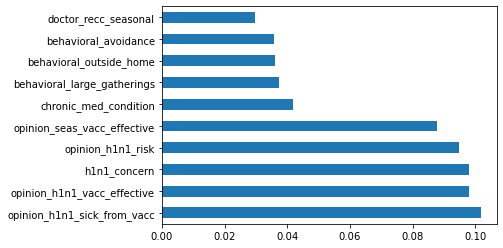

In [35]:
# Feature columns
X = ohe_training_df.iloc[:,0:33]
# Target column - H1N1 Knowledge
y = vaccinetrainingdf.iloc[:,2] 

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Instantiate model
modelfeatures = ExtraTreesClassifier()
modelfeatures.fit(X,y)
print(modelfeatures.feature_importances_) # use built in class 'feature_importances' of tree based classifiers
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(modelfeatures.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

We notice that the top 5 features that are most important to survey respondents are:
- `opinion_h1n1_sick_from_vacc`
- `opinion_h1n1_vacc_effective`
- `h1n1_concern`
- `opinion_h1n1_risk`
- `opinion_seas_vacc_effective`

# 3. Modeling
Now that our data is cleaned, we can go into the modeling. <br>
<br>

### 3.1 Model 1 (Dummy Classifier)
First we want to create a DummyClassifier model that will serve as the baseline for our model performance comparison. A DummyClassifier model in this case would mean that based on the given data, the dummy model would correctly identify our predictions **50%** of the time.

In [36]:
# Created Dummy Classifier model to look at simple accuracy score
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_smote, y_smote)
y_pred = dummy.predict(X_smote)
y_test_pred = dummy.predict(X_test_smote)
y_pred_df = pd.DataFrame(y_pred)
dummy.score(X_test_smote, y_test_smote)

C:\Users\Beter\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


0.5039237668161435

Accuracy Score: 0.509
Precision Score: 0.450


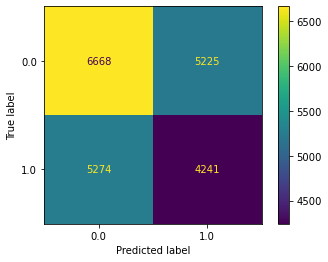

In [37]:
# Called function and printed out confusion and printed out Accuracy/Recall Score for DummyClassifier
confusion_and_metrics(dummy, X_test_smote, y_test_smote, y_test_pred)

We print out the `dummy.score` to see that the accuracy score is about 50%, just as we expected.

<br>

We call our `confusion_and_metrics` function that we defined above in order to produce the evaluation metrics of Accuracy and Precision and a confusion matrix for easier visualization. 

<br>

### 3.2 Model 2 (Decision Tree Classifier)
Next we will create an inferential DecisionTree Classifier in order to identify our **most important features**. After we identify our most important features, we can then run a classifiying LogisticRegression model to measure our predictions on the dataset. 


In [38]:
# Displayed cross validation score for the dummy model
from sklearn.model_selection import train_test_split, cross_val_score

dummy_cross_val = cross_val_score(dummy, X_smote, y_pred_df)

dummy_cross_val

C:\Users\Beter\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


array([0.49988288, 0.509487  , 0.50714453, 0.51487468, 0.51089248])

In [39]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier (random_state = 10)
dt.fit(X_smote, y_smote)
y_dt_pred = dt.predict(X_smote)
y_dt_test_pred = dt.predict(X_test_smote)
dt.score(X_test_smote, y_test_smote)

0.5554932735426009

Similarly like how we checked the DummyClassifier, we also check the plot the confusion matrix and check the metrics of our baseline decision tree.

Accuracy Score: 0.555
Precision Score: 0.500


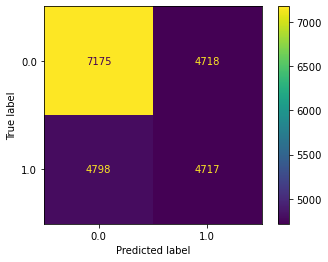

In [40]:
# Called function and printed out confusion matrix and metrics of iniital decision tree
confusion_and_metrics(dt, X_test_smote, y_test_smote, y_dt_test_pred)

After running our initial DecisionTree Classifier, we got an accuracy score of about **56%**. As you can see, this accuracy score is only about 6% better than the baseline.
<br>

#### Implementing GridSearchCV to Find Optimal Hyperparameters
We decided to use a `GridSearchCV` in order find the best hyperparameters to pass into our DecisionTree Classifier so that we can find the most important features to focus on.

In [41]:
# Created grid paramater to perform a GridSearch to find optimal decision tree parameters
grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [100, 500, 1000, 5000],
    'min_samples_leaf': [100, 500, 1000, 5000]
}
# initializing our grid search with the grid parameter we created above
gs = GridSearchCV(estimator = dt, param_grid = grid, cv = 5)
gs.fit(ohe_training_df, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [100, 500, 1000, 5000],
                         'min_samples_split': [100, 500, 1000, 5000]})

After we run our `GridSearchCV`, we print out the `best_params_`, `best_score_`, and the `best_estimator_` to get the optimal parameters and metrics based on the grid search results.

In [42]:
gs.best_params_

{'max_depth': 7, 'min_samples_leaf': 100, 'min_samples_split': 100}

In [43]:
gs.best_score_

0.6770884108866996

In [44]:
gs.best_estimator_.score(ohe_test_df, y_test)


0.6696495432080276

In [45]:
gs.n_features_in_

33

In [46]:
# Converted the results from the GridSearch to a DataFrame for easier visualization
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048013,0.001324,0.009579,0.000788,1,100,100,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.644702,0.644702,0.644823,0.644823,0.644823,0.644775,0.000059,109
1,0.048081,0.002682,0.009973,0.000630,1,100,500,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.644702,0.644702,0.644823,0.644823,0.644823,0.644775,0.000059,109
2,0.049832,0.003685,0.010999,0.001084,1,100,1000,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.644702,0.644702,0.644823,0.644823,0.644823,0.644775,0.000059,109
3,0.044780,0.000810,0.009999,0.000672,1,100,5000,"{'max_depth': 1, 'min_samples_leaf': 100, 'min...",0.644702,0.644702,0.644823,0.644823,0.644823,0.644775,0.000059,109
4,0.044751,0.000749,0.009766,0.000416,1,500,100,"{'max_depth': 1, 'min_samples_leaf': 500, 'min...",0.644702,0.644702,0.644823,0.644823,0.644823,0.644775,0.000059,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.051214,0.000875,0.008188,0.000408,10,1000,5000,"{'max_depth': 10, 'min_samples_leaf': 1000, 'm...",0.659865,0.666604,0.668976,0.657742,0.665980,0.663833,0.004280,73
156,0.044173,0.000333,0.008193,0.000392,10,5000,100,"{'max_depth': 10, 'min_samples_leaf': 5000, 'm...",0.644702,0.644702,0.644823,0.644823,0.644823,0.644775,0.000059,109
157,0.044093,0.000408,0.008498,0.000436,10,5000,500,"{'max_depth': 10, 'min_samples_leaf': 5000, 'm...",0.644702,0.644702,0.644823,0.644823,0.644823,0.644775,0.000059,109
158,0.044443,0.001037,0.008314,0.000522,10,5000,1000,"{'max_depth': 10, 'min_samples_leaf': 5000, 'm...",0.644702,0.644702,0.644823,0.644823,0.644823,0.644775,0.000059,109


After we figure out the best parameters, we create a new DecisionTree Classifier and pass in the GridSearchCV results in order to produce the metrics and a confusion matrix for easier visualization. 

In [47]:
dt2 = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 100, min_samples_split = 100)
dt2.fit(X_smote, y_smote)
y_dt2_pred = dt.predict(X_smote)
y_dt2_test_pred = dt.predict(X_test_smote)
dt2.score(X_test_smote, y_test_smote)

0.6277559790732437

Accuracy Score: 0.628
Precision Score: 0.500


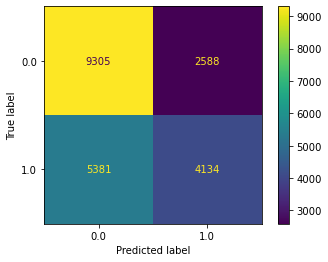

In [48]:
confusion_and_metrics(dt2, X_test_smote, y_test_smote, y_dt2_test_pred)

We also plotted the DecisionTree and exported it out to `out.pdf` for better visualization in a PDF Reader program.

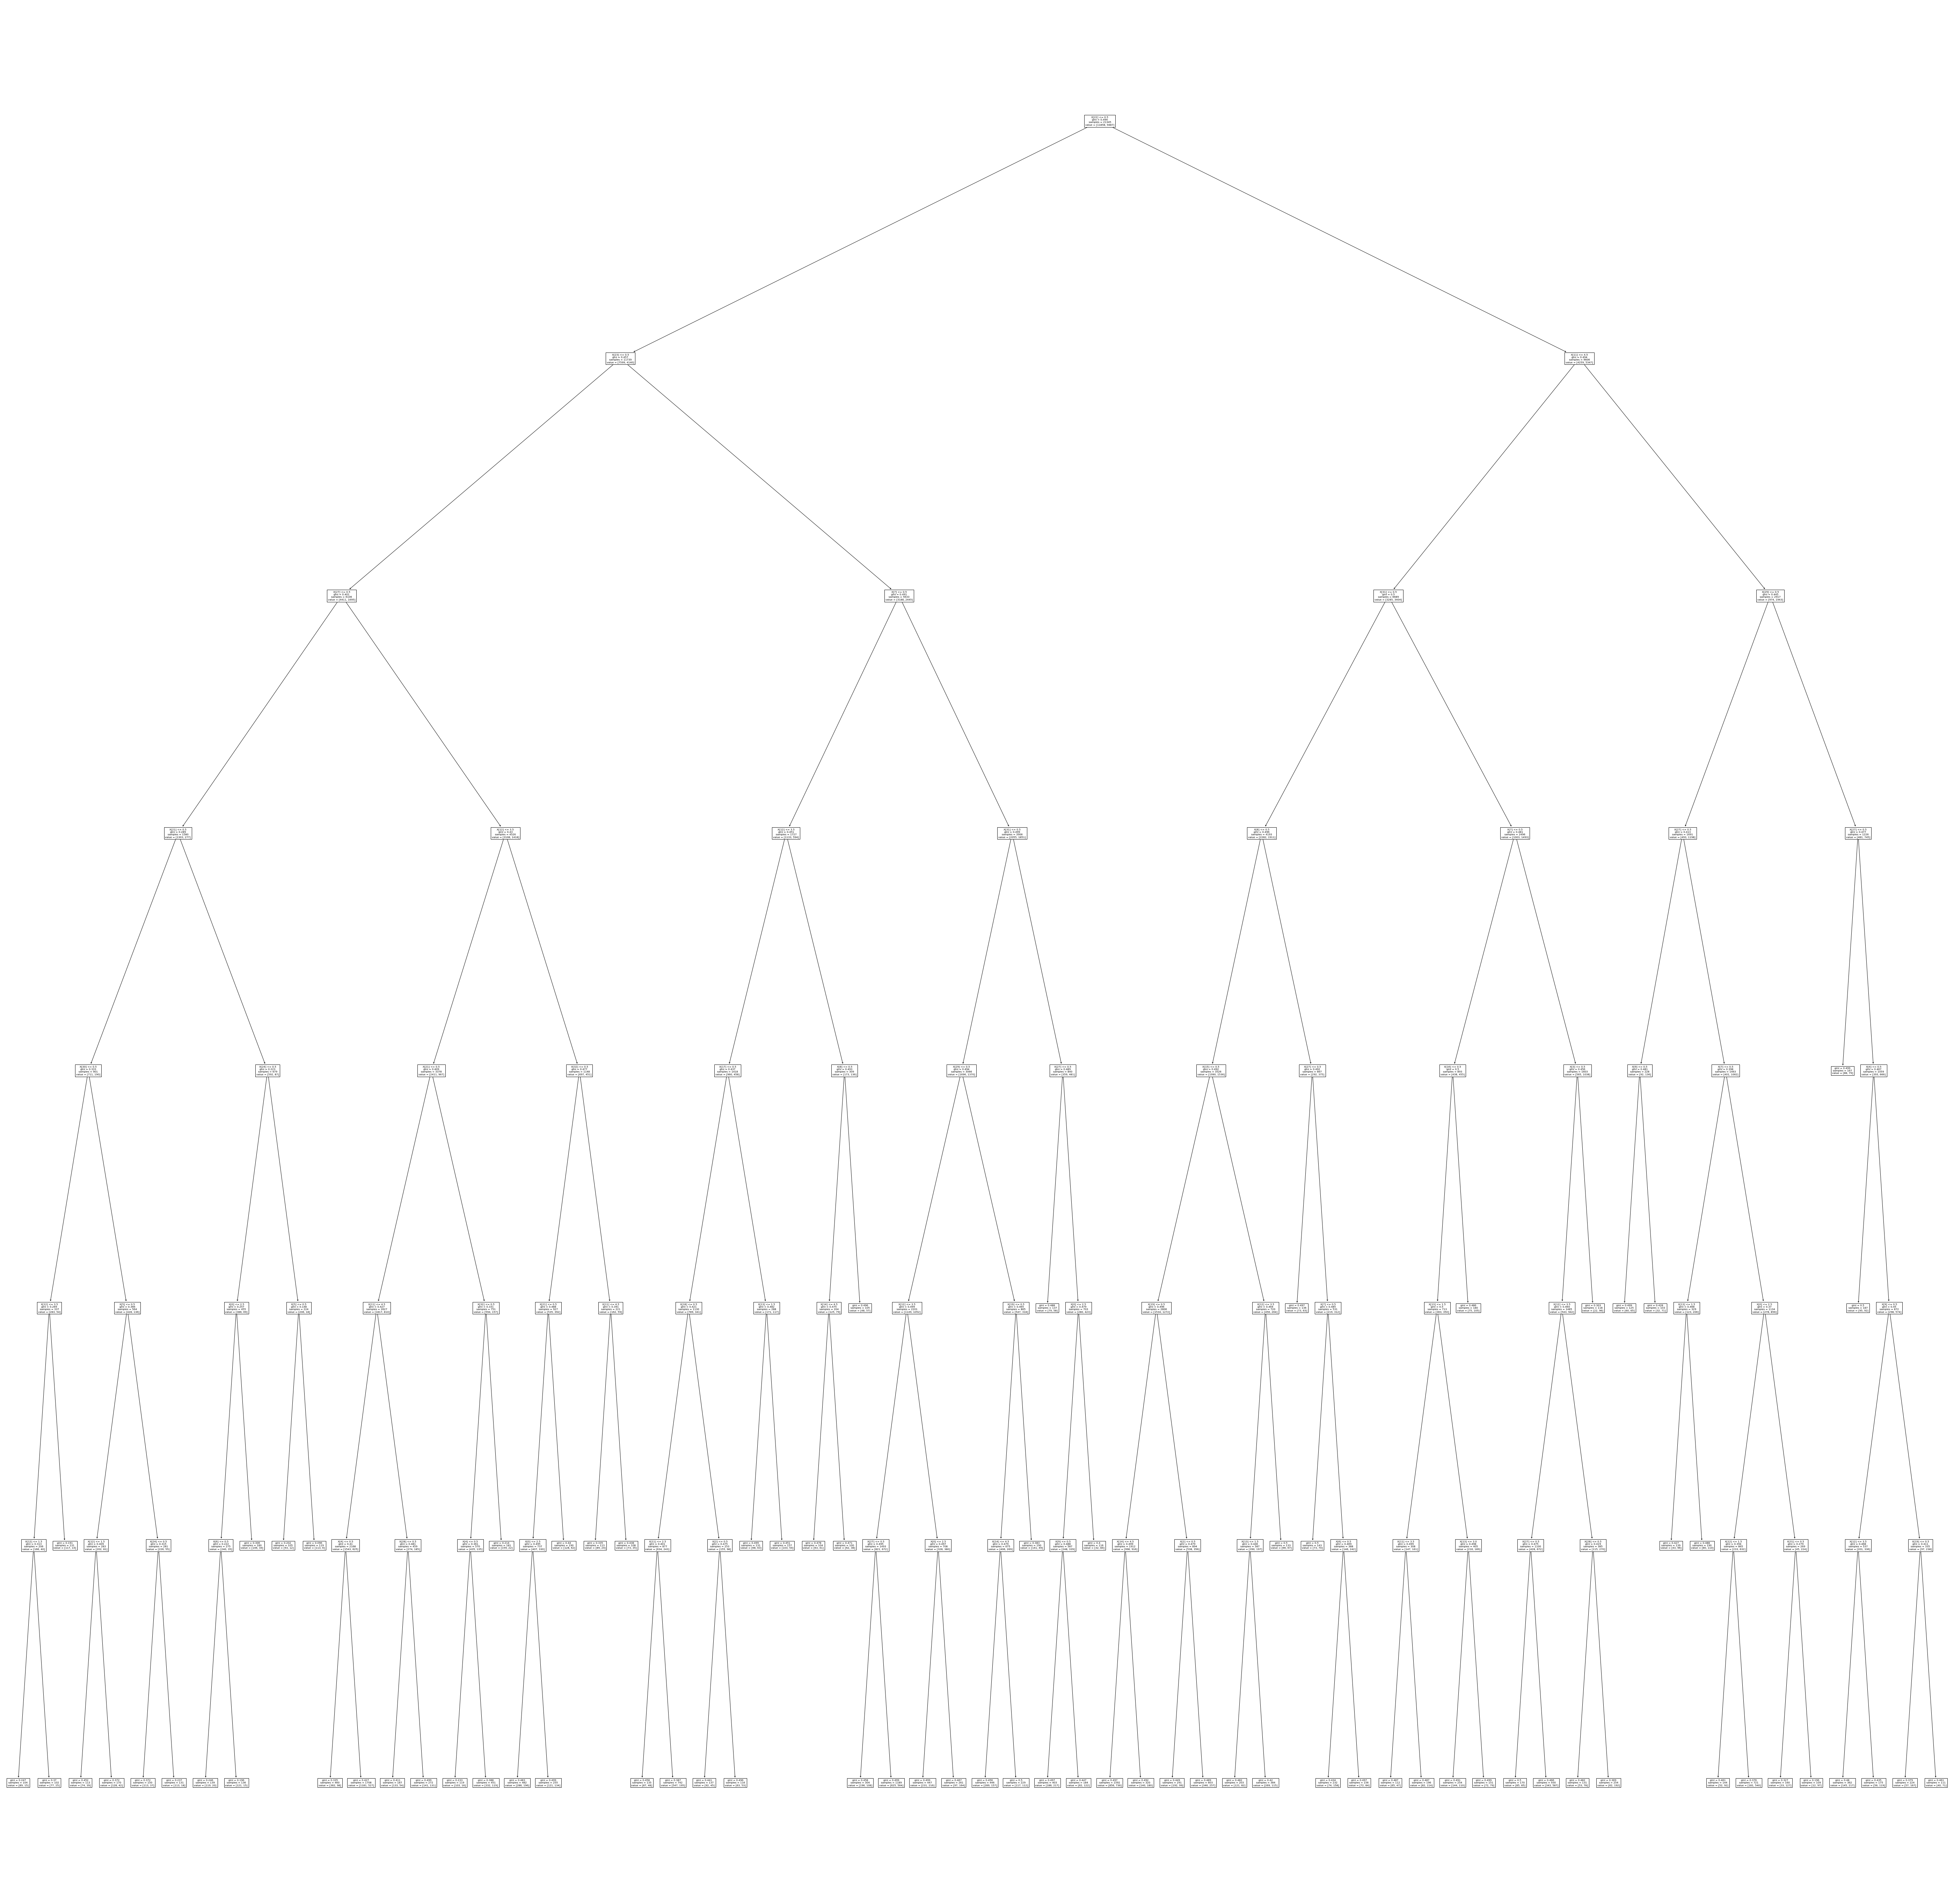

In [49]:
f, ax = plt.subplots(figsize=(100, 100))
plot_tree(dt2, ax=ax);
# plt.savefig('out.pdf')

From this DecisionTree, we recognize that our X[21] is one of the most important features for us to split our data. We exported the DecisionTree and took a closer look at the features to split on. Next we will run a LogisticRegression model.

### 3.3 Model 3 (Logistic Regression)
After running our DecisionTree Classifier, we implemented a `LogisticRegression` model to find our best predicitions on H1N1 knowledge.

In [50]:
# Importing the appropriate library
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_smote, y_smote)
y_lr_pred = model.predict(X_smote)
y_lr_test_pred = model.predict(X_test_smote)
model.score(X_test_smote, y_test_smote)

C:\Users\Beter\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6392470104633782

We plot out the confusion matrix and produce the metrics to see that our model is accurate in predicting whether a respondent is knowledgeable about H1N1 or not about **64%** of the time. This is a **14%** increase from our baseline model. The precision of this model also increased about **10%** meaning that our model correctly identifies knowledgeable respondents **60%** of the time.
<br>

The precision increase to 60% is important to us because in our models we would like to focus more on those who responded that they are knowledgeable about H1N1 Flu and Vaccine, but in reality they are not knowledgeable at all (*False Negative*).

Accuracy Score: 0.639
Precision Score: 0.607


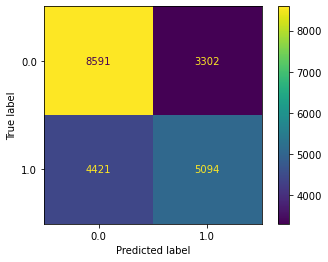

In [51]:
confusion_and_metrics(model, X_test_smote, y_test_smote, y_lr_test_pred)

# 4. Results
## Interpreting LogisticRegression Results

We found that our LogisticRegression model produced the highest accuracy score of **64%** and the highest precision score of **60%**.
<br>

We want to also identify the coefficients in this array produced by our model. We want to identify the lowest coefficient and take the power of that coefficient in order to produce an odds value.

In the cell below, we are simply extracting the column names from the dataset, inputting them into a dictionary, and flipping the dictionary values. We then rename the columns in this coefficient dataframe to reflect the appropriate changes.

In [52]:
# Extracting column names into a dictionary
model_column_names = {c: i for i, c in enumerate(ohe_training_df.columns)}

# Flipping the column keys and values
model_column_names_flipped = {model_column_names[k]:k for k in model_column_names}

# Turning the coefficients array into a dataframe
model_coef = pd.DataFrame(model.coef_)

model_coef.rename(model_column_names_flipped, axis = 1, inplace = True)
# Checking to see if the rename was done correctly
model_coef.columns
# Those with an education of less than 12 years are 0.5x not as likely to get the vaccine and those with a below poverty income level are 0.7x less likely to get a vaccine 

Index(['h1n1_concern', 'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'age_group_18 - 34 Years',
       'age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years', 'education_12 Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'race_Black', 'race_Hispanic',
       'race_Other or Multiple', 'race_White', 'sex_Female', 'sex_Male',
       'income_poverty_<= $75,000, Above Poverty', 'income_poverty_> $75,000',
       'income_poverty_Below Poverty'],
      dtype='object')

In [53]:
# Printing out new dataframe to check if renaming was done correctly.
model_coef

,h1n1_concern,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,sex_Female,sex_Male,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty
0,0.035508,0.099257,-0.006057,0.373423,0.190417,-0.038747,-0.082113,0.309525,0.232663,0.099652,0.047142,0.091567,0.081544,-0.068996,0.001399,-0.199779,0.065924,0.200738,0.123995,-0.261384,-0.216114,-0.70963,0.624283,0.230956,-0.305906,-0.094146,0.007625,0.321921,0.088577,-0.159083,-0.032394,0.332381,-0.370492


We identify that from this array, the column of `education_< 12 Years` was our lowest coefficient. To make sense of this number we take the exponent of this value.

In [54]:
# Calling function that defined above to intepret these coefficient values into odds instead of log-odds.
print_odds(model_coef, 'education_< 12 Years')

education_< 12 Years: -0.7096304913126568
Odds: 0.491825897830874


From this we see that those with an  `education_< 12 Years` are about **0.49x** as likely to be knowledgeable about the H1N1 flu and vaccine.  

In [55]:
print_odds(model_coef, 'income_poverty_Below Poverty')

income_poverty_Below Poverty: -0.3704921781352383
Odds: 0.6903944499503388


From this we can see that respondents who indicate `income_poverty_Below Poverty` are about **0.69x** as likely to be knowledgeable about the H1N1 Flu and Vaccine.  

In [56]:
print_odds(model_coef, 'sex_Male')

sex_Male: -0.15908263411918186
Odds: 0.8529258752785617


From this we can see that respondents who indicate `sex_Male` are about **0.85x** as likely to be knowledgeable about the H1N1 Flu and Vaccine.  

## Visualizations 

Below we will be graphing some of the important features that can lead to misinformation: **overall knowledge of H1N1** and **concern for H1N1** as they both can lead to misinformation. 

 

In [57]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .7)

### Concern for H1N1

We found that a majority of respondents either indicated that they were `somewhat_concerned` or `very_concerned`. 

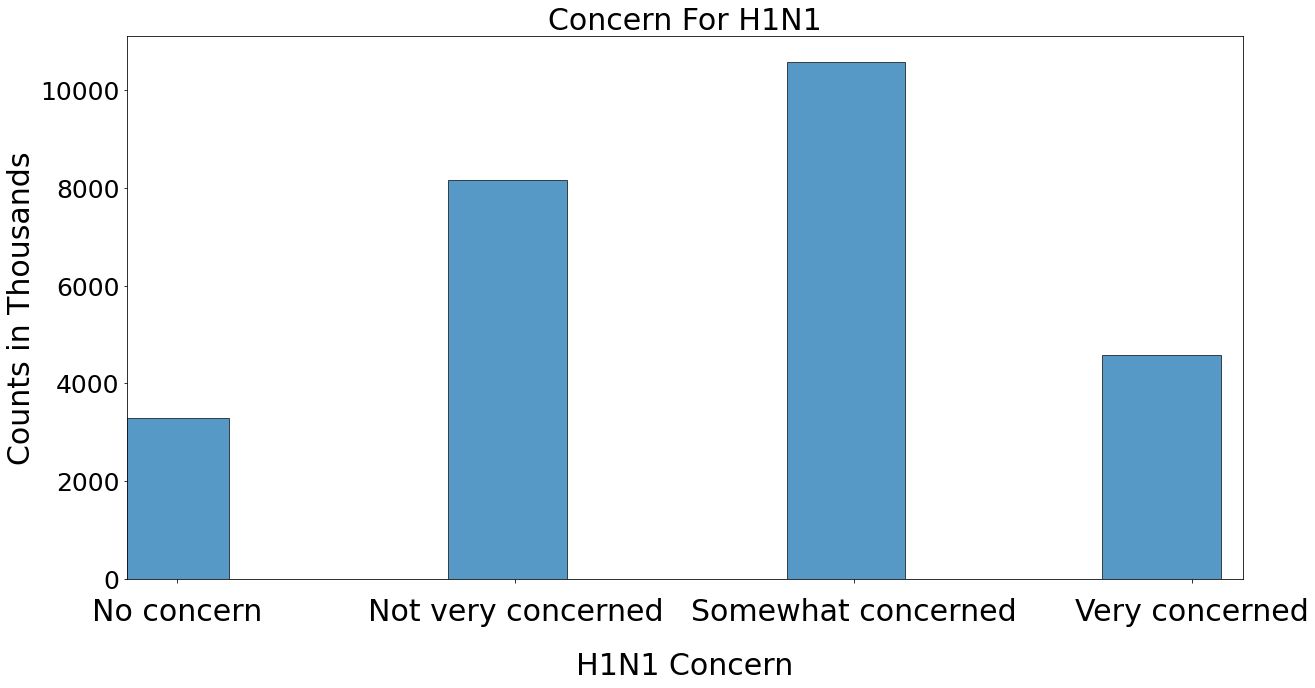

In [58]:
fig, ax = plt.subplots()
sns.histplot(data=vaccinetrainingdf, x="h1n1_concern")
#ax.set_xlim(0,4)
ax.set_xticks(range(0,4))
fig.set_size_inches(20,10)
plt.title('Concern For H1N1',fontsize=30)
plt.xlabel('H1N1 Concern',fontsize=30, labelpad=25)
plt.ylabel('Counts in Thousands',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
ax.set_xticklabels(['No concern','Not very concerned','Somewhat concerned','Very concerned'])
change_width(ax, .35)
ax.tick_params(axis='x', which='major', pad=15);

### Knowledge about H1N1 

Over 65% of the respondents know little to nothing about H1N1, which coincides with our findings from the previous graph. 
These findings show us that even though a majority of respondents are somewhat concerned or very concerned, a majority of these self-same respondents also claim to have little to no knowledge of the H1N1 flu and vaccine as well.
<br>

We want to arm these unknowledgeable respondents with properly sourced information so that they can protect themselves (especially considering that the H1N1 Flu had a 100,000 to 500,000 mortality in the US since it was discovered).

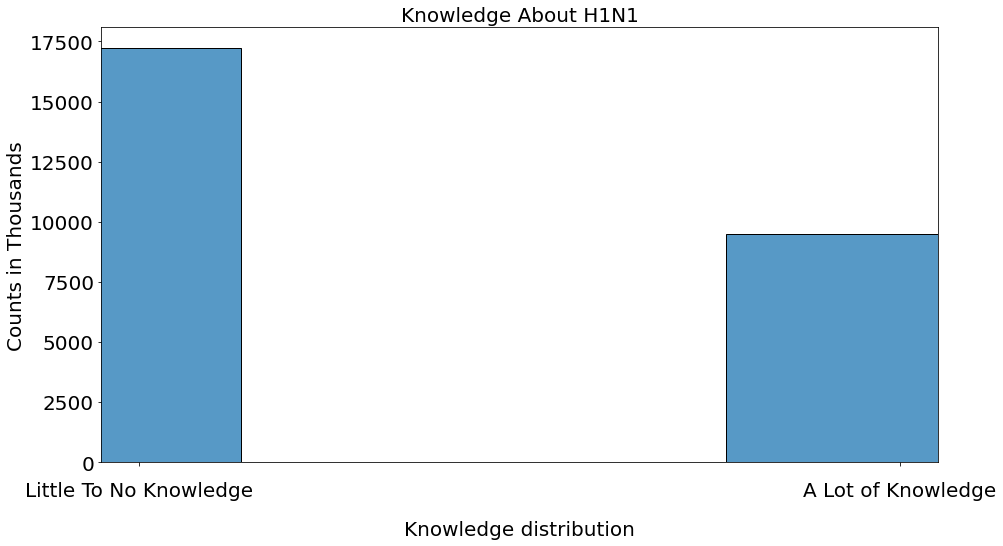

In [59]:
fig, ax = plt.subplots()
sns.histplot(data=vaccinetrainingdf, x="h1n1_knowledge")
ax.set_xticks(range(0,2))
fig.set_size_inches(15,8)
plt.title('Knowledge About H1N1',fontsize=20)
plt.xlabel('Knowledge distribution',fontsize=20, labelpad=20)
plt.ylabel('Counts in Thousands',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_xticklabels(['Little To No Knowledge','A Lot of Knowledge'])
change_width(ax, .30)
ax.tick_params(axis='x', which='major', pad=15);

The fact that a majority of respondents have little to no knowledge AND are somewhat-very concerned about the H1N1 flu means that there are likely more respondents who identify as false negatives.

# 5. Conclusion

We care about our precision score over our recall score because it is more important to identify the false negatives in this dataset. A False Negative prediction is reflective of a respondent spreading misinformation. If a survey respondent indicates that they are very knowledgeable about the H1N1 flu and vaccine, but in reality they **do not** know much about the flu at all, it can be problematic. A misinformed individual will spread their "knowledge" about the H1N1 flu and vaccine, and it can lead to more individuals being misinformed. This completely contradicts the goals and mission of the CDC.
<br>

We ran a couple of models to see what would produce the best accuracy and precision score. The **Logistic Regression** model performed the best between the models by producing an accuracy score of **64%** and a precision score of **60%**.
<br>

The Logistic Regression model also gave us coefficients that would help us identify the features that would most influential on a respondents knowledge of the H1N1 Flu and vaccine.
<br>

Some of these features include:
- Income
- Education Level
- Sex
<br>

As always we have to remember that since this is a survey response dataset, there are inherent biases that are present. We should avoid making generalizations based on sensetive features such as sex and race; however, it may be important to ***identify*** these features as areas of focus/improvement for the CDC to allocate more resources and funding so that these underrepresented communities receive the same knowledge and opportunities.

# 6. Recommendations 

We recommend that the CDC:

-  Implement a PR campaign about the H1N1 flu and vaccine. This campaign will aim to provide the correct information and readily available sources for the entire public. Increasing accessibility to educational resources is essential in combatting misinformation.
<br> 

- Making sure that those who responded as "concerned about the flu" know that there is a vaccine available and that if needed, they can talk to their doctors about any concerns. Doctor opinion is an important factor to consider because as medical profesisonals they are the first point of contact for a patient's immediate concerns. Doctors can also provide their patients with the correct information on how best to protect themselves from the flu.
<br>

- Making sure the right resources are allocated so that those with less than 12 years of education are just as informed as respondents who indicated a higher level of education. Knowledge about the proper health and safety techniques are a human right that should be accessible to everyone.

# 7. Future Considerations

The next steps we'd like to implement 

- Promoting the same awareness for modern pandemics such as COVID-19. We can create a survey that has similar features and implement any new modern health concerns (like mental health for example)
<br>

- Similar surveys can be conducted and research data that has already been collected can be analyzed to predict similar targets(especially now since information in this day and age is so readily available and is prone to misinformation)
<br>

- We can also utilize this data to invest in more promotional material to increase awareness in the underepresented communities since the dataset was so imbalanced.